<h2>Assignment 1 - Part 1: Linear Regression on Boston Housing Data</h2>

You're asked to do the following tasks to predict boston house price:
<lu>
<li>Use scikit-learn</li>
<li>Implement analytical solution (normal equation) to obtain weights</li>
<li>Implement numerical solution (gradient descent) to obtain weights</li>
</lu>
    Note: the accuracy of your implementations should be close to that of a linear model from scikit-learn

In addition, you need to show the resulting intercept and coefficents, calculate errors on training dataset and testing dataset, and plot a figure to show your predictions and real prices on the testing dataset. 

In [0]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn import datasets, linear_model
from scipy import linalg
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams


# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

In [0]:
# Load data from scikit-learn, which returns (data, target)
# note: if you call "boston = load_boston()", it returns a dictionary-like object
data, target = datasets.load_boston(True)

# Split the data into two parts: training data and testing data
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)

Coefficient: 
[[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
  -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
   2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
  -5.08571424e-01]]
Intercept: 
[30.24675099]
Training Error is:  21.641412753226323
Testing Error is:  24.291119474973616


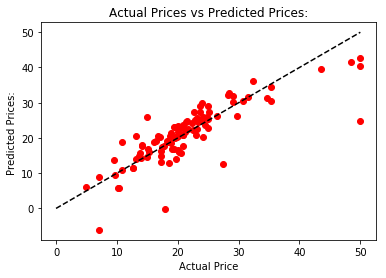

In [923]:
# Task 1-1: use linear regression in sklearn
from sklearn.linear_model import LinearRegression
reg = linear_model.LinearRegression()
reg = LinearRegression().fit(train_data,train_target)


plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices: ")
plt.title("Actual Prices vs Predicted Prices:")


# Task 1-2: show intercept and coefficients

print("Coefficient: ")
print(reg.coef_)

print("Intercept: ")
print(reg.intercept_)

X_pred = reg.predict(train_data)
Y_pred = reg.predict(test_data)
# Task 1-3: show errors on training dataset and testing dataset
mse2 = sklearn.metrics.mean_squared_error(train_target, X_pred)
mse = sklearn.metrics.mean_squared_error(test_target, Y_pred)
print("Training Error is: ", mse2)
print("Testing Error is: ", mse)

# Task 1-4: show plot a figure to show your predictions and real prices on the testing dataset

plt.scatter(test_target,Y_pred, color = 'red')
plt.plot([0,50],[0,50],'--k')
plt.show()


# <h4>Use scikit-learn library in the following cell</h4>

Coefficient: 
[-0.11305592]
[0.03011046]
[0.04038072]
[2.7844382]
[-17.20263339]
[4.4388352]
[-0.00629636]
[-1.44786537]
[0.26242974]
[-0.01064679]
[-0.91545624]
[0.01235133]
[-0.50857142]
Intercept: 
[30.24675099]
Training Error is:  21.641412753226312
Testing Error is:  24.29111947497721


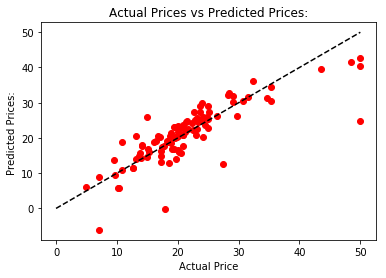

In [924]:
# Task 2-1: Implement a function solving normal equation 
# Inputs: Training data and  training label
# Output: Weights
from numpy.linalg import inv

def myNormalEqualFun(X,y):
    return inv(X.T.dot(X)).dot(X.T).dot(y)
    
# Task 2-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return X.dot(w)

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myNormalEqual to train the model and get weights

w = myNormalEqualFun(train_data_intercept,train_target)

p = myPredictFun(train_data_intercept,w)
a = myPredictFun(test_data_intercept,w)
# Task 2-3: show intercept and coefficents

print("Coefficient: ")
for i in range(1,w.shape[0]) :
   print(w[i])

print("Intercept: ")
print(w[0])

# Task 2-4: show errors on training dataset and testing dataset


mse =sklearn.metrics.mean_squared_error(test_target, a)

mse2 =sklearn.metrics.mean_squared_error(train_target, p)
print("Training Error is: ", mse2)
print("Testing Error is: ", mse)


# Task 2-5: show plot a figure to show your predictions and real prices on the testing dataset
plt.scatter(test_target,a, color = 'red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices: ")
plt.title("Actual Prices vs Predicted Prices:")



plt.plot([0,50],[0,50],'--k')
plt.show()


<h4>Use analytical solution (normal equation) to perform linear regression in the following cell</h4>

<h4>Use numerical solution (gradient descent) to perform linear regression in the following cell</h4>

Coefficient: 
[-0.95149234]
[0.58523707]
[0.09510703]
[0.7446168]
[-1.92757318]
[3.20140114]
[-0.19328592]
[-2.99250974]
[1.70052117]
[-1.17840886]
[-2.00782786]
[1.12896992]
[-3.5896952]
Intercept: 
[22.79653462]
Training Error is:  21.68840454699446
Testing Error is:  24.691181817294954


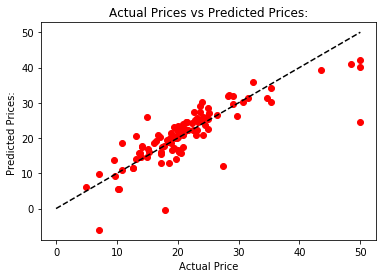

In [925]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 3-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of iterations
# Output: Weights
def myGradientDescentFun(X,y,learning_rate,numItrs):
  weights = np.zeros((X.shape[1],1))
  for i in range(0,numItrs) :
     weights = weights + learning_rate*( 1/(X.shape[0]))*(X.T).dot(y - X.dot(weights))
  return weights

  
# Task 3-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return X.dot(w)

  
  
# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)



# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w = myGradientDescentFun(train_data_intercept,train_target,.02,1000)

p = myPredictFun(train_data_intercept,w)
a = myPredictFun(test_data_intercept,w)
# Task 3-3: show intercept and coefficents

print("Coefficient: ")
for i in range(1,w.shape[0]) :
   print(w[i])

print("Intercept: ")
print(w[0])


# Task 3-4: show errors on training dataset and testing dataset
mse =sklearn.metrics.mean_squared_error(test_target, a)
mse2 =sklearn.metrics.mean_squared_error(train_target, p)
print("Training Error is: ", mse2)
print("Testing Error is: ", mse)


# Task 3-5: show plot a figure to show your predictions and real prices on the testing dataset
plt.scatter(test_target,a, color = 'red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices: ")
plt.title("Actual Prices vs Predicted Prices:")



plt.plot([0,50],[0,50],'--k')
plt.show()
